<a href="https://colab.research.google.com/github/TaniaHafsa/DIP_lab_final_task/blob/main/DIP_lab_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task-1

Upload the image(DIP_Lab_task_01.png) from drive with extracting details like: image dimension, frequency distribution of intensities, range.

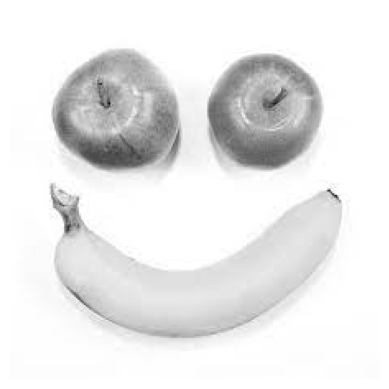

Image Dimensions: 225x225
Intensity Range: 5-255


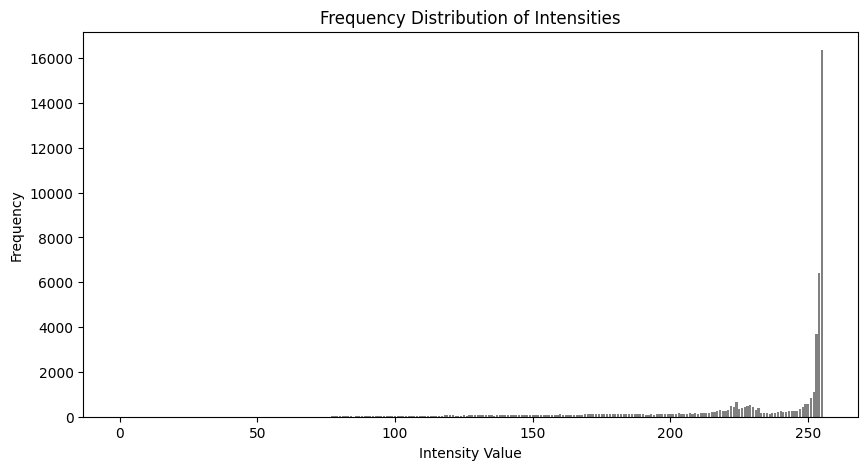

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io


lab_task1 = '/content/drive/MyDrive/DIP_Lab_task_01.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# dimensions
height, width = image.shape
print(f"Image Dimensions: {width}x{height}")

# frequency distribution
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
hist = hist.flatten()

# range
min_intensity = image.min()
max_intensity = image.max()
print(f"Intensity Range: {min_intensity}-{max_intensity}")

# histogram
plt.figure(figsize=(10, 5))
plt.title("Frequency Distribution of Intensities")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.bar(range(256), hist, color='gray')
plt.show()

Task-2

Convert the RGB image(DIP_Lab_task_02.jpg) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison).


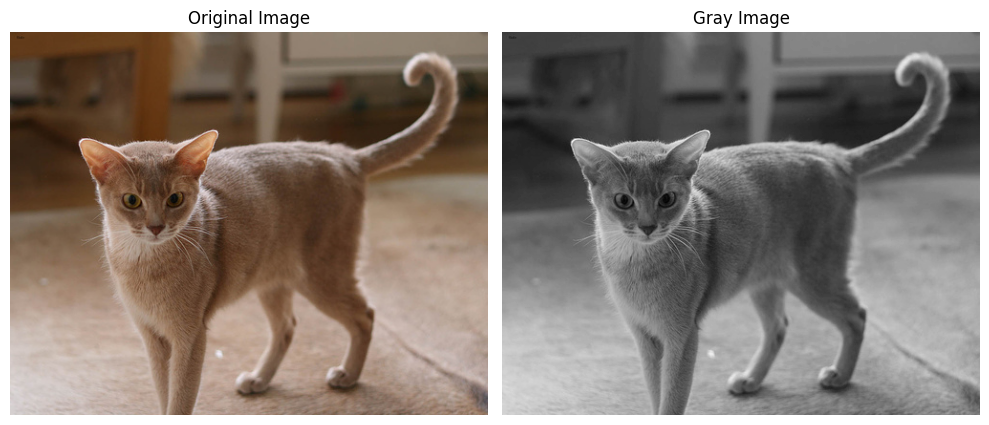

In [14]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt


lab_task2 = io.imread('/content/drive/MyDrive/DIP_Lab_task_02.jpg')[:, :, :3]  # Ensure only RGB channels

# RGB to grayscale
def rgbtogray(image):
    ret = (image[:, :, 0] * 0.2989 +
           image[:, :, 1] * 0.5870 +
           image[:, :, 2] * 0.1140).astype(np.uint8)
    return ret


grayImg = rgbtogray(lab_task2)

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(lab_task2)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(grayImg, cmap='gray')
ax[1].set_title('Gray Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()
